In [103]:
#Import data and Metrics library
library(Metrics)
data <- read.csv("Assignment 3 Data - Format Fixes.csv")
head(data)

Player,Age,Tm,Pos,GP,G,A,PTS,Plus_Minus,PIM,...,SH_A,S,S.,TOI,ATOI,BLK,HIT,FOW,FOL,FO.
Vitaly Abramov\abramvi01,22,OTT,RW,2,0,0,0,0,0,...,0,0,NA,19,9.43,0,0,0,0,NA
Noel Acciari\acciano01,29,FLA,C,41,4,7,11,0,9,...,1,68,5.9,631,15.24,63,91,272,247,52.4
Calen Addison\addisca01,20,MIN,D,3,0,0,0,0,0,...,0,4,0.0,56,18.31,1,2,0,0,NA
Kenny Agostino\agostke01,28,TOR,LW,1,0,0,0,0,0,...,0,0,NA,4,4.08,0,0,0,0,NA
Andrew Agozzino\agozzan01,30,ANA,LW,3,0,1,1,0,0,...,0,3,0.0,37,12.11,7,6,16,16,50.0
Jack Ahcan\ahcanja01,23,BOS,D,3,0,0,0,-3,0,...,0,5,0.0,62,20.38,5,2,0,0,NA


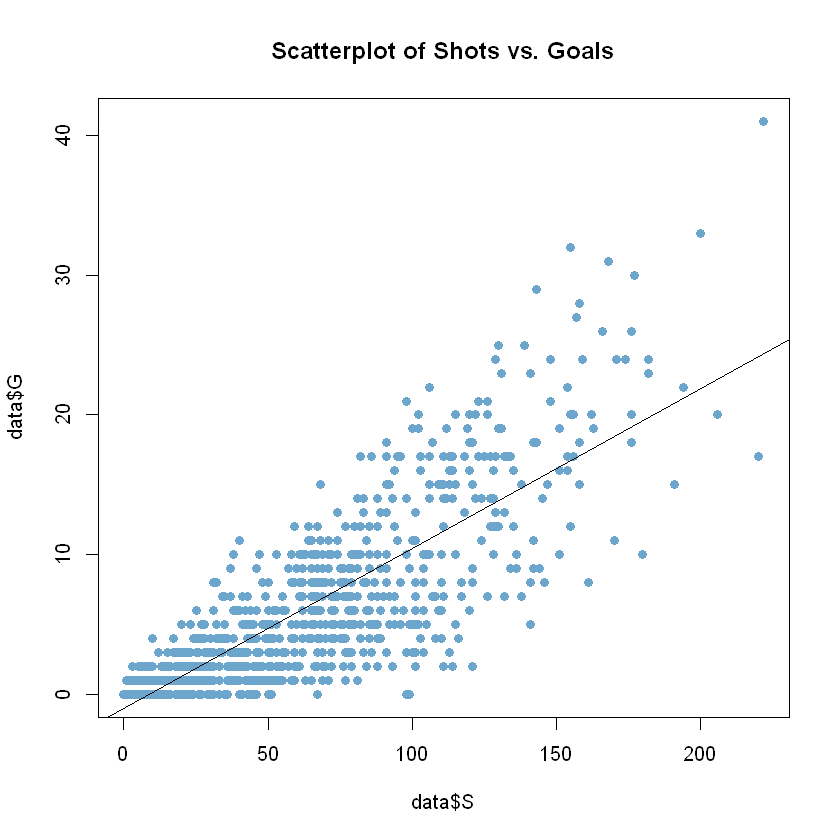

In [11]:
#Question 1 - Scatterplot of Shots and Goals w/ line of best fit
plot(data$S, data$G, col="skyblue3", pch=19, main="Scatterplot of Shots vs. Goals")
abline(lm(G~S, data=data))

In [12]:
#Question 1 - Correlation Coef
cor(data$S, data$G)

[1] 0.8405712

In [13]:
#Question 2 - Correlation Matrix
#Correlation Matrix
new_df <- data[, c("GP", "G", "A", "Plus_Minus", "S", "TOI")]
cor(new_df)

,GP,G,A,Plus_Minus,S,TOI
GP,1.00000000,0.6390421,0.7041412,0.07438656,0.8318223,0.9369698
G,0.63904210,1.0000000,0.7413281,0.21343833,0.8405712,0.6271062
A,0.70414122,0.7413281,1.0000000,0.28344258,0.8415927,0.7878359
Plus_Minus,0.07438656,0.2134383,0.2834426,1.00000000,0.1524369,0.1257391
S,0.83182235,0.8405712,0.8415927,0.15243689,1.0000000,0.8646437
TOI,0.93696985,0.6271062,0.7878359,0.12573914,0.8646437,1.0000000


In [ ]:
#Question 2 - Written Response

#Here, I am looking for students to say that Shots would be the best variable for a simple linear regression because it is
#most correlation with goals

In [14]:
#Train/test split step (not for marks)

#Set seed
set.seed(0)

#Set sample size for training set (80% of data)
sample_size=round(nrow(data)*0.8)
index <- sample(seq_len(nrow(data)), size=sample_size)

#Split data by index
train <- data[index, ]
test <- data[-index, ]

In [15]:
#Question 4 - Shots Model
model_1 <- lm(G~S, data=train)
summary(model_1)


Call:
lm(formula = G ~ S, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3098  -1.8847   0.3437   1.2758  16.4812 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.126786   0.183334  -6.146 1.24e-09 ***
S            0.115521   0.002621  44.068  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.409 on 822 degrees of freedom
Multiple R-squared:  0.7026,	Adjusted R-squared:  0.7022 
F-statistic:  1942 on 1 and 822 DF,  p-value: < 2.2e-16


In [30]:
#Question 4B
#Make predictions using predict function
preds_1 <- predict(model_1, data.frame(S=test[ , "S"]))
head(preds_1)

1         2         3         4         5         6 
-1.126786  4.880287  1.068106  6.035494 17.125476  7.768303

In [27]:
#Question 4B
#Calculate mae, mse, and rmse
mae(test$G, preds_1)
mse(test$G, preds_1)
rmse(test$G, preds_1)

[1] 2.225586

[1] 10.13771

[1] 3.183977

In [28]:
#Question 5 - Shots and GP Model
model_2 <- lm(G~S+GP, data=train)
summary(model_2)


Call:
lm(formula = G ~ S + GP, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.819  -1.437  -0.052   1.393  13.830 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.062787   0.225069  -0.279     0.78    
S            0.144792   0.004582  31.602  < 2e-16 ***
GP          -0.080965   0.010559  -7.668 4.93e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.295 on 821 degrees of freedom
Multiple R-squared:  0.7225,	Adjusted R-squared:  0.7218 
F-statistic:  1069 on 2 and 821 DF,  p-value: < 2.2e-16


In [31]:
#Question 5 - Shots and GP Model
#Make predictions using predict function
preds_2 <- predict(model_2, data.frame(S=test[ , "S"], GP=test[, "GP"]))
head(preds_2)

1         2         3         4         5         6 
-0.143752  3.094264  1.149918  4.704114 18.280284  6.714063

In [32]:
#Question 5 - Shots and GP Model
#Calculate mae, mse, and rmse
mae(test$G, preds_2)
mse(test$G, preds_2)
rmse(test$G, preds_2)

[1] 2.235317

[1] 11.20101

[1] 3.346791

In [34]:
#Question 5 - Shots and TOI Model
model_3 <- lm(G~S+TOI, data=train)
summary(model_3)


Call:
lm(formula = G ~ S + TOI, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.597  -1.470  -0.061   1.230  13.719 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0724004  0.1854700   -0.39    0.696    
S            0.1688043  0.0047297   35.69   <2e-16 ***
TOI         -0.0073138  0.0005605  -13.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.104 on 821 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7531 
F-statistic:  1256 on 2 and 821 DF,  p-value: < 2.2e-16


In [35]:
#Question 5 - Shots and TOI Model
#Make predictions using predict function
preds_3 <- predict(model_3, data.frame(S=test[ , "S"], TOI=test[, "TOI"]))
head(preds_3)

1          2          3          4          5          6 
-0.1016558  0.3383894  2.0231771  5.2445212 18.8460038  6.0139500

In [36]:
#Question 5 - Shots and TOI Model
#Calculate mae, mse, and rmse
mae(test$G, preds_3)
mse(test$G, preds_3)
rmse(test$G, preds_3)

[1] 2.139845

[1] 10.688

[1] 3.26925

In [38]:
#Question 5 - Shots and is_defence Model

#Create new variable called is_d in both training and test set
train$is_defence <- ifelse(train$Pos=="D", 1, 0)
test$is_defence <- ifelse(test$Pos=="D", 1, 0)

In [39]:
model_4 <- lm(G~S+is_defence, data=train)
summary(model_4)


Call:
lm(formula = G ~ S + is_defence, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-8.054 -1.738 -0.358  1.957 16.132 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.324892   0.189235   1.717   0.0864 .  
S            0.110556   0.002348  47.088   <2e-16 ***
is_defence  -3.327284   0.222042 -14.985   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.023 on 821 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7659 
F-statistic:  1347 on 2 and 821 DF,  p-value: < 2.2e-16


In [40]:
#Question 5 - Shots and is_defence Model
#Make predictions using predict function
preds_4 <- predict(model_4, data.frame(S=test[ , "S"], is_defence=test[, "is_defence"]))
head(preds_4)

1          2          3          4          5          6 
 0.3248919  2.7465098  2.4254523  7.1793522 17.7927100  8.8376893

In [41]:
#Question 5 - Shots and is_defence Model
#Calculate mae, mse, and rmse
mae(test$G, preds_4)
mse(test$G, preds_4)
rmse(test$G, preds_4)

[1] 2.046554

[1] 7.494304

[1] 2.737573

In [42]:
#Question 6

#See solutions document for summary of R2, MAE, MSE, and RMSE

In [43]:
#Question 7 - Theory

#A) Students should see that all model metrics for the "Shots + Is_Defence" model are best. It has the highest R2 and lowest
#MAE, MSE, and RMSE, so it's the best model.

#B) The regression equation for this model is: G = 0.324892 + 0.110556*S -3.327284*is_defence. The interpretation is as follows:

# For every 1 unit increase in shots, players are expected to score approximately 0.11 more goals, all else being equal
# On average, defencemen are expected to score approximately 3.3 goal less than forwards, holding shots constant

# Similar interpretations will be accepted for other models, though students will not get full marks because they chose the
# wrong model

In [75]:
#Question 7 - 95% Confidence Intervals for Coefficient Estimates

#Model 1 Coefficients
coef_1 <- summary(model_1)[4]
coef_1

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.1267861,0.183333684,-6.146094,1.237187e-09
S,0.1155206,0.002621434,44.067726,1.156840e-218


In [85]:
#Intercept
lb_int_1 <- -1.1267861 - 1.96*0.183333684
ub_int_1 <- -1.1267861 + 1.96*0.183333684
print(paste(lb_int_1, ub_int_1))

[1] "-1.48612012064 -0.76745207936"


In [87]:
#Shots
lb_shots_1 <- 0.1155206 - 1.96*0.002621434
ub_shots_1 <- 0.1155206 + 1.96*0.002621434
print(paste(lb_shots_1, ub_shots_1))

[1] "0.11038258936 0.12065861064"


In [88]:
#Model 2 Coefficients
coef_2 <- summary(model_2)[4]
coef_2

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.06278658,0.225068638,-0.2789664,7.803409e-01
S,0.14479199,0.004581672,31.6024328,4.798292e-144
GP,-0.08096543,0.010558585,-7.6682085,4.931948e-14


In [89]:
#Intercept
lb_int_2 <- -0.06278658 - 1.96*0.225068638
ub_int_2 <- -0.06278658 + 1.96*0.225068638
print(paste(lb_int_2, ub_int_2))

[1] "-0.50392111048 0.37834795048"


In [90]:
#Shots
lb_shots_2 <- 0.14479199 - 1.96*0.004581672
ub_shots_2 <- 0.14479199 + 1.96*0.004581672
print(paste(lb_shots_2, ub_shots_2))

[1] "0.13581191288 0.15377206712"


In [91]:
#Games Played
lb_gp_2 <- -0.08096543 - 1.96*0.010558585
ub_gp_2 <- -0.08096543 + 1.96*0.010558585
print(paste(lb_gp_2, ub_gp_2))

[1] "-0.1016602566 -0.0602706034"


In [92]:
#Model 3 Coefficients
coef_3 <- summary(model_3)[4]
coef_3

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.072400403,0.1854699782,-0.3903618,6.963703e-01
S,0.168804263,0.0047296856,35.6903772,3.638334e-169
TOI,-0.007313839,0.0005604548,-13.0498276,1.662092e-35


In [93]:
#Intercept
lb_int_3 <- -0.072400403 - 1.96*0.1854699782
ub_int_3 <- -0.072400403 + 1.96*0.1854699782
print(paste(lb_int_3, ub_int_3))

[1] "-0.435921560272 0.291120754272"


In [94]:
#Shots
lb_shots_3 <- 0.168804263 - 1.96*0.0047296856
ub_shots_3 <- 0.168804263 + 1.96*0.0047296856
print(paste(lb_shots_3, ub_shots_3))

[1] "0.159534079224 0.178074446776"


In [95]:
#TOI
lb_toi_3 <- -0.007313839 - 1.96*0.0005604548
ub_toi_3 <- -0.007313839 + 1.96*0.0005604548
print(paste(lb_toi_3, ub_toi_3))

[1] "-0.008412330408 -0.006215347592"


In [97]:
#Model 4 Coefficients
coef_4 <- summary(model_4)[4]
coef_4

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.3248919,0.189234606,1.716874,8.637944e-02
S,0.1105558,0.002347852,47.088074,1.704543e-235
is_defence,-3.3272843,0.222041777,-14.984947,4.718460e-45


In [98]:
#Intercept
lb_int_4 <- 0.3248919 - 1.96*0.189234606
ub_int_4 <- 0.3248919 + 1.96*0.189234606
print(paste(lb_int_4, ub_int_4))

[1] "-0.04600792776 0.69579172776"


In [99]:
#Shots
lb_shots_4 <- 0.1105558 - 1.96*0.002347852
ub_shots_4 <- 0.1105558 + 1.96*0.002347852
print(paste(lb_shots_4, ub_shots_4))

[1] "0.10595401008 0.11515758992"


In [100]:
#Is_Defence
lb_def_4 <- -3.3272843 - 1.96*0.222041777
ub_def_4 <- -3.3272843 + 1.96*0.222041777
print(paste(lb_def_4, ub_def_4))

[1] "-3.76248618292 -2.89208241708"


In [104]:
#Question 8

#Create df with actuals, predicted, residuals, and player. Might have to round...
final_df <- data.frame(test$Player, test$Pos, test$G, preds_4)
colnames(final_df) <- c("Player", "Position", "Actual_Goals", "Predicted_Goals")
final_df$Residual <- final_df$Actual_Goals - final_df$Predicted_Goals
head(final_df)

Player,Position,Actual_Goals,Predicted_Goals,Residual
Kenny Agostino\agostke01,LW,0,0.3248919,-0.3248919
Michael Anderson\andermi02,D,1,2.7465098,-1.7465098
Anthony Angello\angelan01,C,2,2.4254523,-0.4254523
Josh Archibald\archijo01,RW,7,7.1793522,-0.1793522
Cam Atkinson\atkinca01,RW,15,17.7927100,-2.7927100
Josh Bailey\bailejo01,C,8,8.8376893,-0.8376893


In [105]:
#Identify player with largest negative residual to determine "undervalued talent".
sorted <- final_df[order(final_df$Residual), ]
head(sorted)

,Player,Position,Actual_Goals,Predicted_Goals,Residual
158,Ryan Pulock\pulocry01,D,2,10.374861,-8.374861
99,Nazem Kadri\kadrina01,C,11,19.119380,-8.119380
106,Torey Krug\krugto01,D,2,9.269303,-7.269303
83,Dougie Hamilton\hamildo01,D,10,16.897654,-6.897654
188,Shea Theodore\theodsh01,D,8,14.797093,-6.797093
129,Timo Meier\meierti01,RW,12,17.461043,-5.461043


In [ ]:
#Nazem Kadri is most undervalued forward